In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 데이터 변수 설명
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준의 신용도
    - => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [2]:
DATA_DIR = './data'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

TRAIN_PATH = os.path.join(DATA_DIR, TRAIN_DATA)
TEST_PATH = os.path.join(DATA_DIR, TEST_DATA)

In [3]:
df_train = pd.read_csv(TRAIN_PATH)
df_test = pd.read_csv(TEST_PATH)
df = pd.concat([df_train, df_test])
df = df.reset_index(drop=True)
df = df.drop('index', axis=1)

# Train Data 와 Test Data 의 개수
number_of_train_data = df_train.shape[0]
number_of_test_data = df_test.shape[0]

# credit 값을 범주형으로 생각, object 타입으로 바꾸고 one hot 인코딩
y_train_data = pd.DataFrame(df['credit'][:number_of_train_data].astype(int).astype(str))
y_train_data_onehot = pd.get_dummies(y_train_data[["credit"]])

df = df.drop('credit', axis=1)

credit 데이터 (label) : 범주형 값이라고 생각, one hot 인코딩 해준다.

In [4]:
df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
FLAG_MOBIL         int64
work_phone         int64
phone              int64
email              int64
occyp_type        object
family_size      float64
begin_month      float64
dtype: object

# 결측치 확인

In [5]:
# 결측치 확인
df.isnull().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type       11323
family_size          0
begin_month          0
dtype: int64

### occyp_type 에 결측치가 많은 것을 확인 -> occyp_type이 credit에 얼마나 영향을 미치는지 파악해본다.

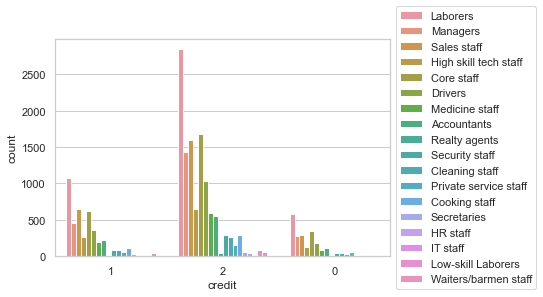

In [6]:
temp_df = pd.merge(df["occyp_type"], y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue="occyp_type", data=temp_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

각 credit에서 비슷한 분포를 보이고 있다

In [7]:
pd.DataFrame(df_train.groupby("occyp_type")["gender"].count())

,gender
occyp_type,
Accountants,902
Cleaning staff,403
Cooking staff,457
Core staff,2646
Drivers,1575
HR staff,62
High skill tech staff,1040
IT staff,41
Laborers,4512


<AxesSubplot:xlabel='occyp_type'>

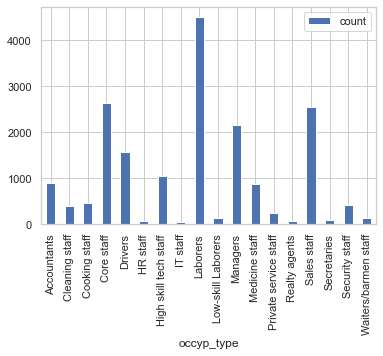

In [8]:
pd.DataFrame(df_train.groupby("occyp_type")["gender"].count()).rename(columns={"gender":"count"}).plot(kind='bar')

Laborers, Core staff, Sales staff, Managers 가 다수임을 확인할 수 있다.

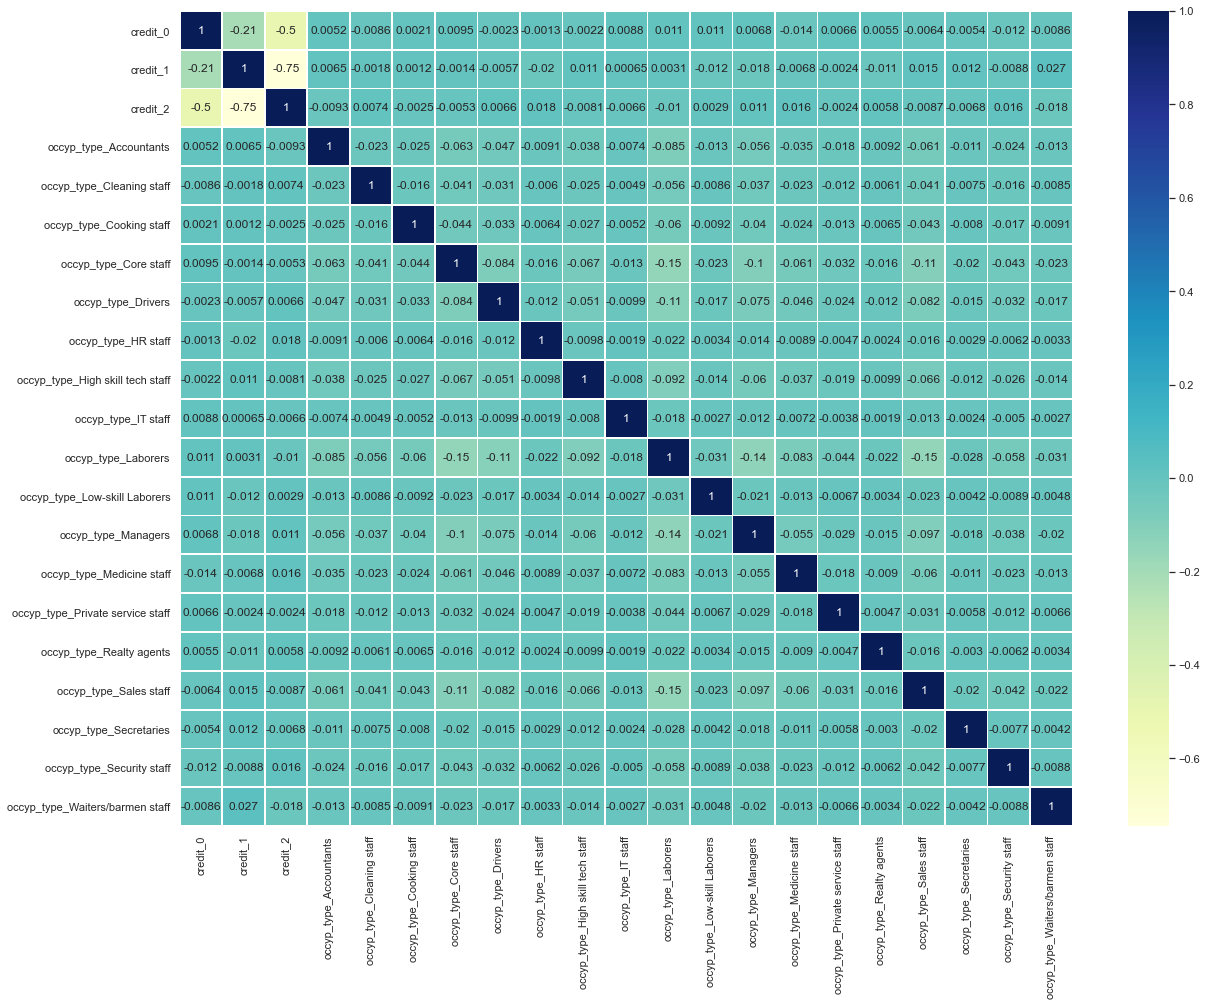

In [9]:
temp_df = pd.merge(y_train_data_onehot, pd.get_dummies(df[["occyp_type"]]), left_index=True, right_index=True)
corr = temp_df.corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

눈에 띄게 상관관계를 가지는 것은 볼 수 없다.<br>
mean encoding 으로 상관관계를 확인해본다.

In [10]:
temp_df = pd.merge(df["occyp_type"], y_train_data_onehot, left_index=True, right_index=True)

print(temp_df.groupby("occyp_type")['credit_0'].mean(), "\n")
print(temp_df.groupby("occyp_type")['credit_1'].mean(), "\n")
print(temp_df.groupby("occyp_type")['credit_2'].mean())

occyp_type
Accountants              0.130820
Cleaning staff           0.099256
Cooking staff            0.126915
Core staff               0.131141
Drivers                  0.118730
HR staff                 0.112903
High skill tech staff    0.118269
IT staff                 0.195122
Laborers                 0.129876
Low-skill Laborers       0.173228
Managers                 0.129211
Medicine staff           0.096065
Private service staff    0.144033
Realty agents            0.158730
Sales staff              0.115400
Secretaries              0.092784
Security staff           0.091981
Waiters/barmen staff     0.080645
Name: credit_0, dtype: float64 

occyp_type
Accountants              0.251663
Cleaning staff           0.230769
Cooking staff            0.240700
Core staff               0.235072
Drivers                  0.227302
HR staff                 0.064516
High skill tech staff    0.259615
IT staff                 0.243902
Laborers                 0.239805
Low-skill Laborers       0.

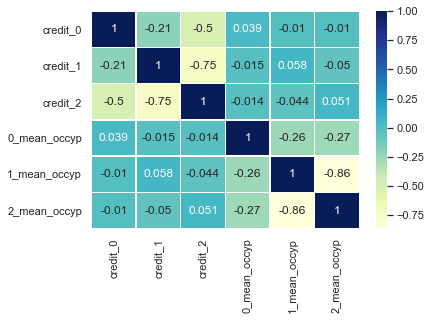

In [11]:
temp_df["0_mean_occyp"] = temp_df["occyp_type"].replace(temp_df.groupby("occyp_type")["credit_0"].mean())
temp_df["1_mean_occyp"] = temp_df["occyp_type"].replace(temp_df.groupby("occyp_type")["credit_1"].mean())
temp_df["2_mean_occyp"] = temp_df["occyp_type"].replace(temp_df.groupby("occyp_type")["credit_2"].mean())

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True,  linewidths=.5, cmap="YlGnBu")

mean 인코딩으로 상관관계를 보았을 때도 뚜렷한 상관관계를 볼 수 없었다.<br>
-> occyp_type 의 값은 빼버리는 것을 고려.

## 각 컬럼의 값 종류 개수 확인

In [12]:
main_df = df.drop("occyp_type", axis=1)
main_df.apply(lambda x: len(x.unique()))

gender              2
car                 2
reality             2
child_num           9
income_total      265
income_type         5
edu_type            5
family_type         5
house_type          6
DAYS_BIRTH       7183
DAYS_EMPLOYED    3640
FLAG_MOBIL          1
work_phone          2
phone               2
email               2
family_size        10
begin_month        61
dtype: int64

FLAG_MOBIL 은 모두 같은 값으로 삭제

In [13]:
main_df = df.drop(["occyp_type","FLAG_MOBIL"], axis=1)
main_df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
work_phone         int64
phone              int64
email              int64
family_size      float64
begin_month      float64
dtype: object

In [14]:
len_df = main_df.apply(lambda x: len(x.unique()))
binary_col = len_df[len_df < 3].index
binary_col

Index(['gender', 'car', 'reality', 'work_phone', 'phone', 'email'], dtype='object')

In [15]:
main_df.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.0,-5.0


### Yes or NO 의 답이 0,1로 들어온 것 바꿔주기

In [16]:
main_df = df.drop(["occyp_type","FLAG_MOBIL"], axis=1)
for col_name in binary_col[3:]:
    main_df[col_name] = main_df[col_name].map({0:"N",1:"Y"})

In [17]:
main_df.head(2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,N,N,N,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,N,N,Y,3.0,-5.0


In [18]:
main_df.dtypes

gender            object
car               object
reality           object
child_num          int64
income_total     float64
income_type       object
edu_type          object
family_type       object
house_type        object
DAYS_BIRTH         int64
DAYS_EMPLOYED      int64
work_phone        object
phone             object
email             object
family_size      float64
begin_month      float64
dtype: object

### object 데이터와 numeric 데이터 나누기 (object 중에서 Y/N 데이터들 binary_col 으로 따로 지정)

In [19]:
object_col = main_df.dtypes[main_df.dtypes == object].index
object_col

Index(['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'work_phone', 'phone', 'email'],
      dtype='object')

In [20]:
numeric_col = main_df.dtypes[main_df.dtypes != object].index
numeric_col

Index(['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'family_size', 'begin_month'],
      dtype='object')

# object data

## binary_col 에 대해서 one hot encoding 해주기

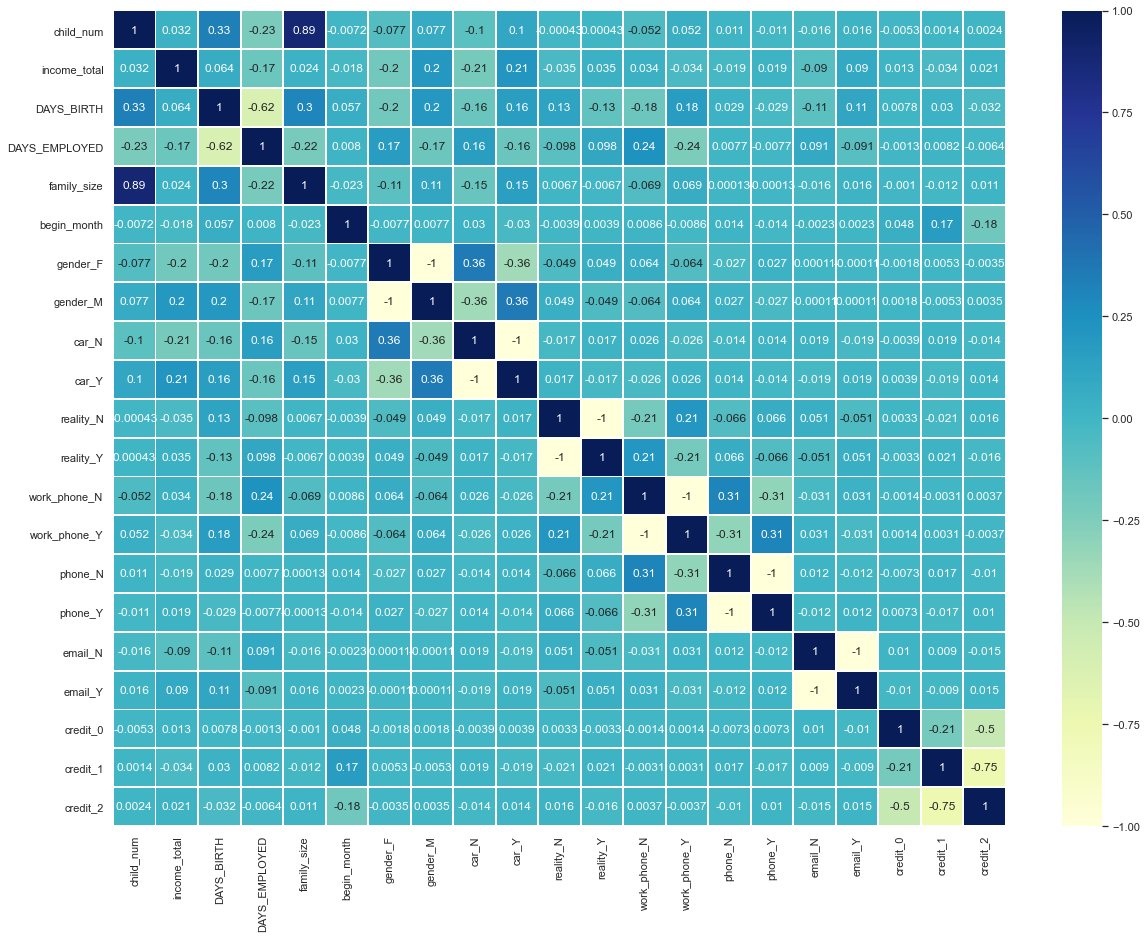

In [21]:
temp_df = main_df.copy()
for col_name in binary_col:
    temp_df = pd.merge(temp_df, pd.get_dummies(main_df[[col_name]]), left_index=True, right_index=True)
# temp_df.head(2)
df_all = temp_df

corr = pd.merge(temp_df, y_train_data_onehot, left_index=True, right_index=True).corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,linewidths=.8, cmap="YlGnBu")

- 뚜렷한 상관관계는 보이지 않음.<br><br>

### 나머지 object columns 에도 one hot encoding

In [22]:
col_list = []
for i in object_col:
    if i not in binary_col:
        col_list.append(i)
col_list

['income_type', 'edu_type', 'family_type', 'house_type']

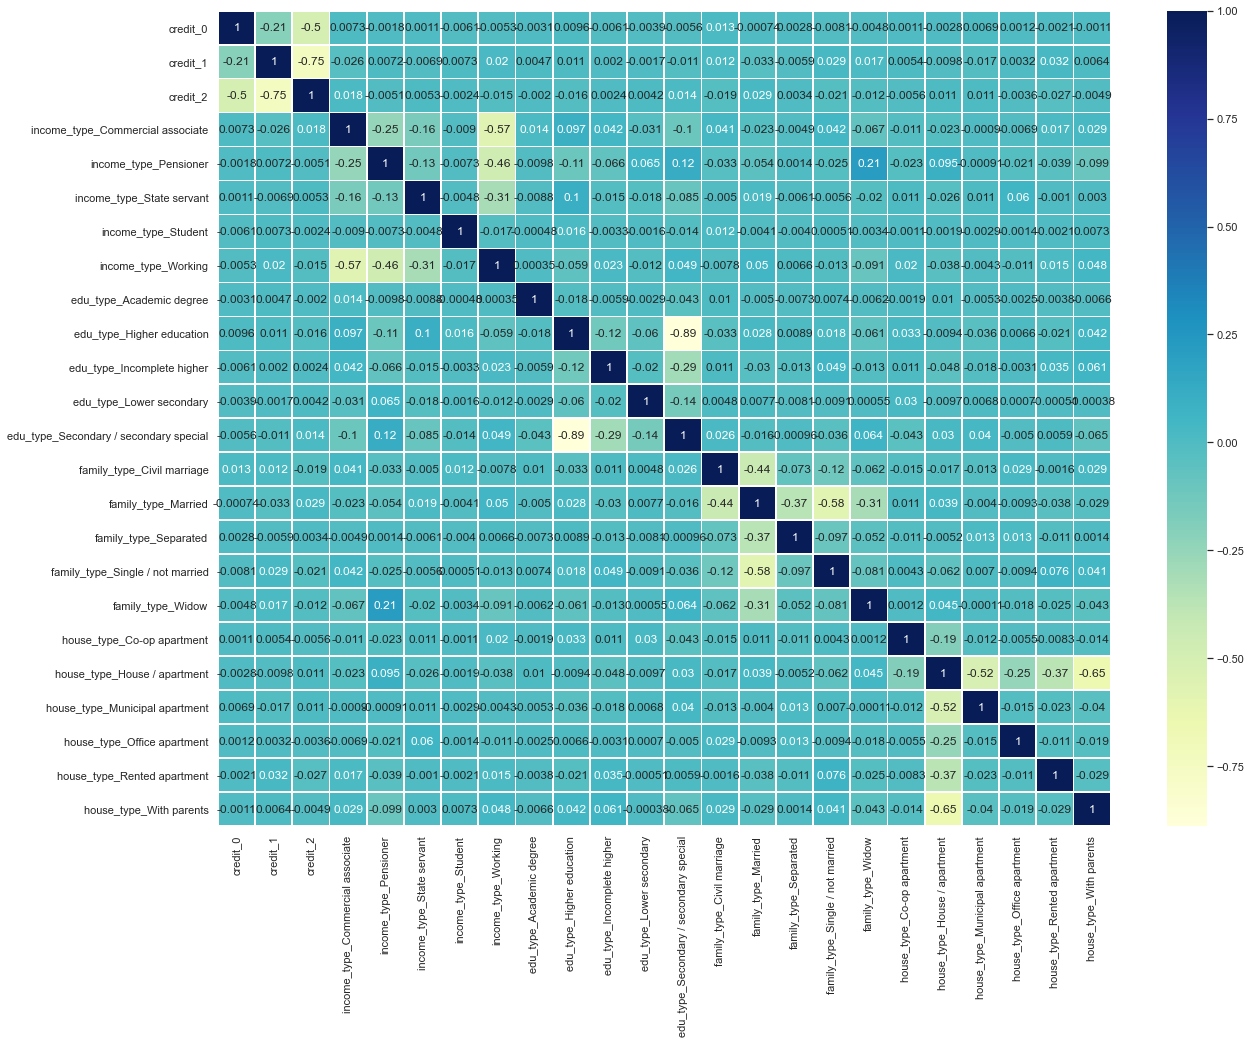

In [23]:
temp_df = y_train_data_onehot
for col_name in col_list:
    temp_df = pd.merge(temp_df, pd.get_dummies(main_df[[col_name]]), left_index=True, right_index=True)
# temp_df.head(2)

corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,linewidths=.8, cmap="YlGnBu")

- 이것 역시 credit과의 직접적인 상관관계는 보이지 않음

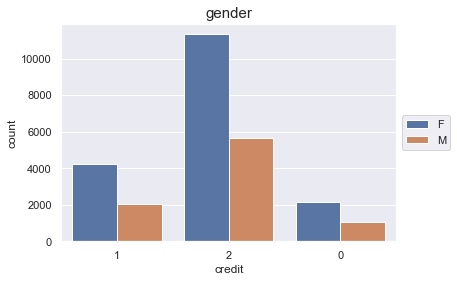

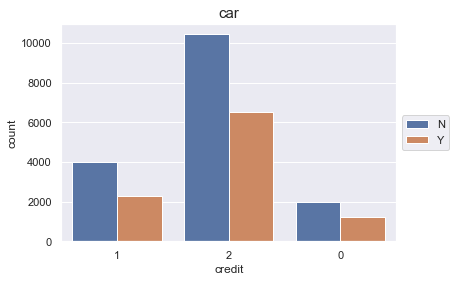

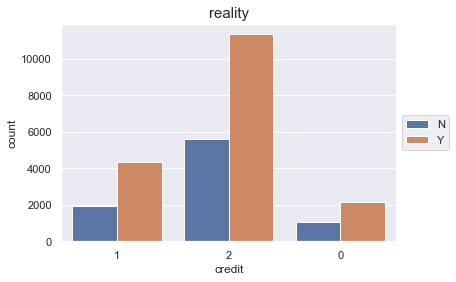

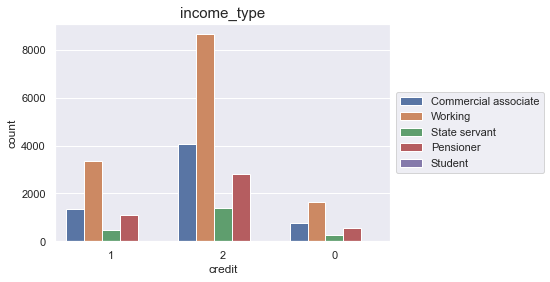

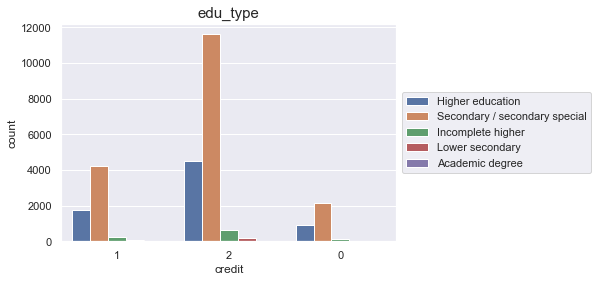

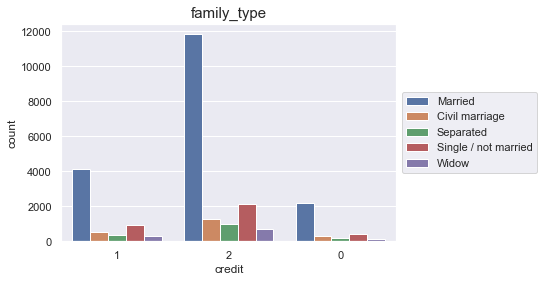

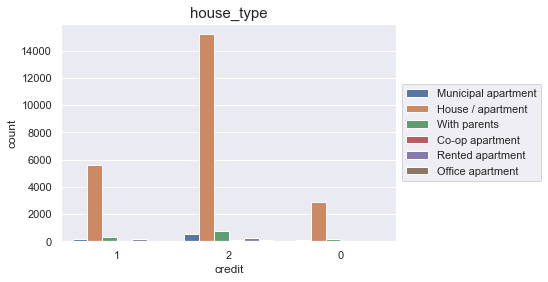

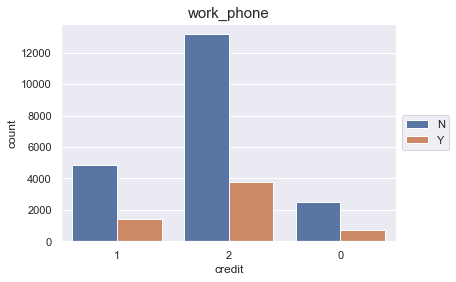

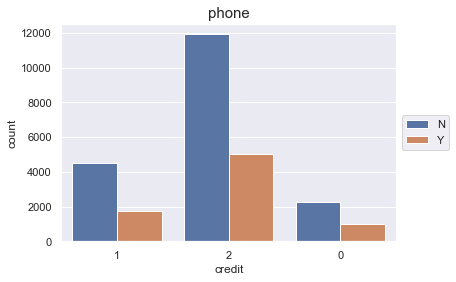

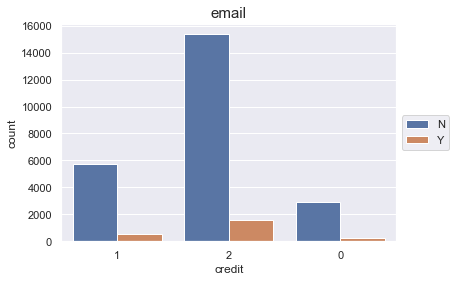

In [24]:
for col_name in object_col:
    temp_df = pd.merge(main_df[col_name], y_train_data, left_index=True, right_index=True)
    sns.countplot(x="credit", hue=col_name, data=temp_df)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(col_name, fontsize=15)
    plt.show()

# numeric data
- DAYS_BIRTH: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- begin_month: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- child_num: 자녀 수
- family_size: 가족 규모

### numeric data 분포 그려보기

In [25]:
main_df["DAYS_BIRTH"] = main_df[["DAYS_BIRTH"]]*-1
main_df["DAYS_EMPLOYED"] = main_df[["DAYS_EMPLOYED"]]*-1
main_df["begin_month"] = main_df[["begin_month"]]*-1

In [26]:
df_all["DAYS_BIRTH"] = df_all[["DAYS_BIRTH"]]*-1
df_all["DAYS_EMPLOYED"] = df_all[["DAYS_EMPLOYED"]]*-1
df_all["begin_month"] = df_all[["begin_month"]]*-1

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

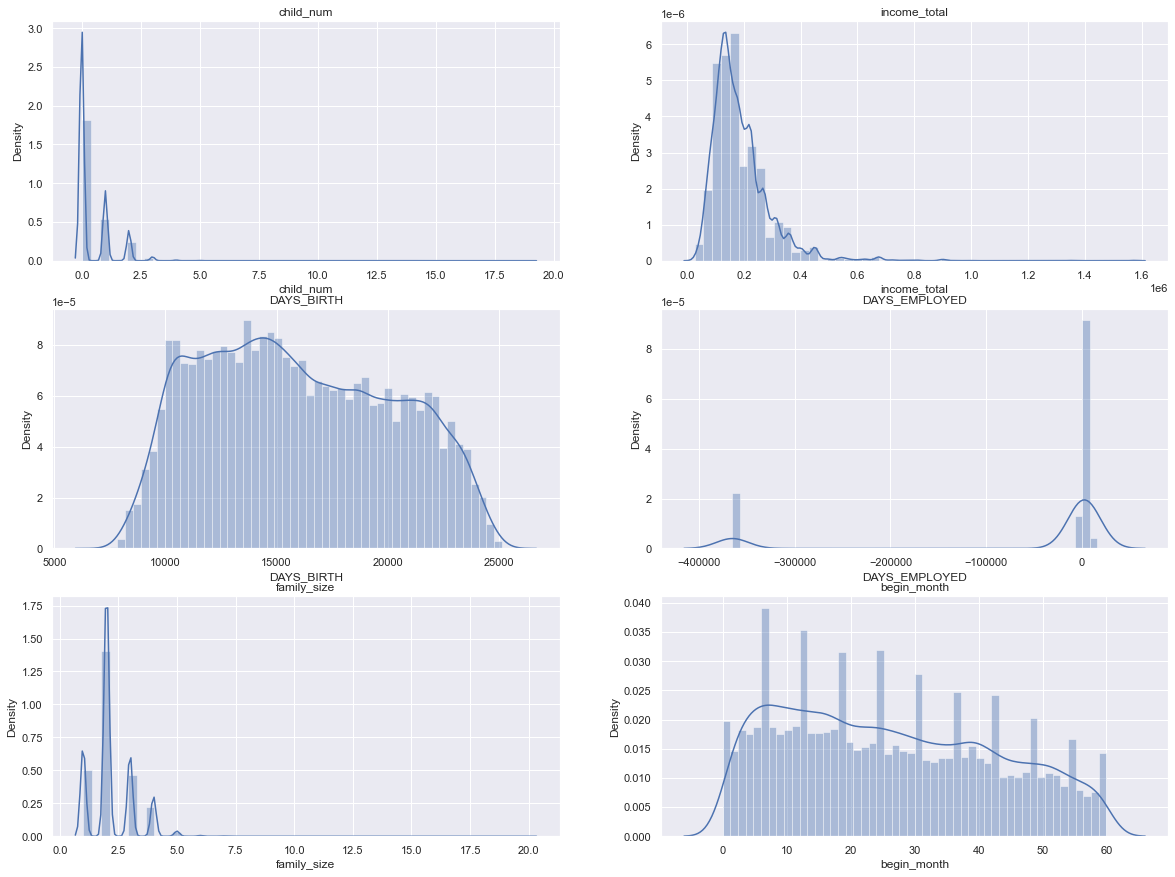

In [27]:
fig = plt.figure()
fig.set_size_inches(20,15) # 싸이즈 설정

ax = []
for i, col_name in enumerate(numeric_col):
    ax.append(fig.add_subplot(3,2,i+1))
    X_1 = main_df[col_name]
    
    ax[i] = sns.distplot(X_1, bins=50)
    ax[i].set_title(col_name)

### Log Transform 해보기

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

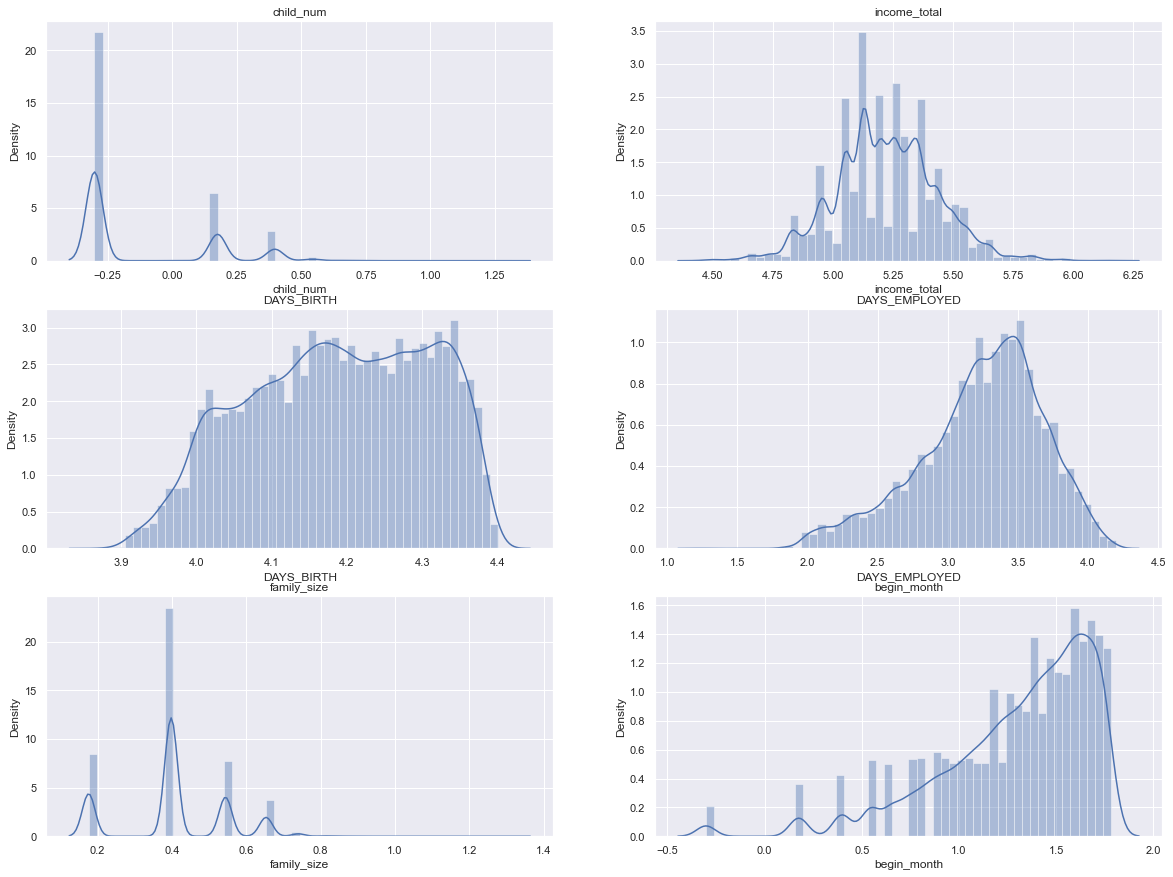

In [28]:
# log transform
fig = plt.figure()
fig.set_size_inches(20,15) # 싸이즈 설정

ax = []
for i, col_name in enumerate(numeric_col):
    ax.append(fig.add_subplot(3,2,i+1))
    X_1 = np.log10(main_df[col_name]+0.5)
    
    ax[i] = sns.distplot(X_1, bins=50)
    ax[i].set_title(col_name)

log transform 후 income_total 과 DAYS_EMPLOYED의 데이터 형태가 좋아진것을 확인 -> 상관관계에 영향이 있는지 확인해보기

In [29]:
df_all["income_total_log"] = np.log10(df_all["income_total"]+0.5)
df_all["DAYS_EMPLOYED_log"] = np.log10(df_all["income_total"]+0.5)
df_all["family_size_log"] = np.log10(df_all["income_total"]+0.5)
df_all["child_num_log"] = np.log10(df_all["income_total"]+0.5)

### income_total 과 log 변환한 값의 상관관계 차이 확인

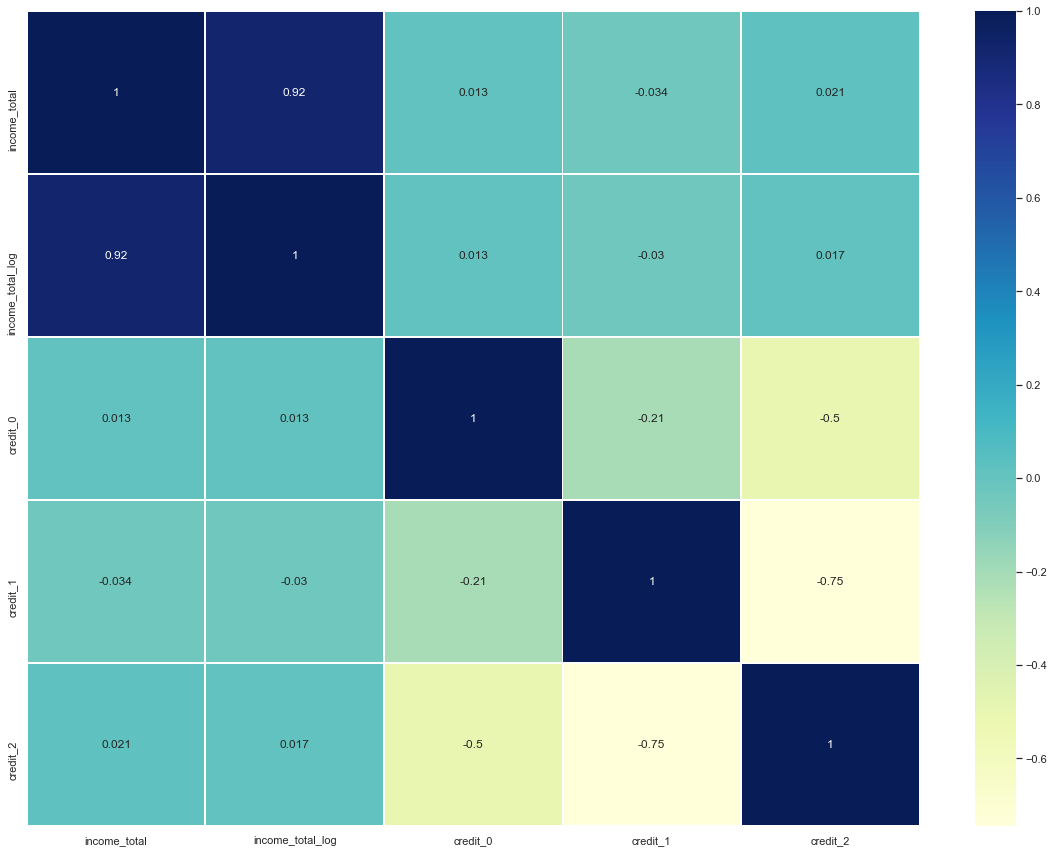

In [30]:
corr = pd.merge(df_all[["income_total", "income_total_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

log 변환이 상관관계에 영향을 미치진 않았다

### numeric data 상관관계 뽑아보기

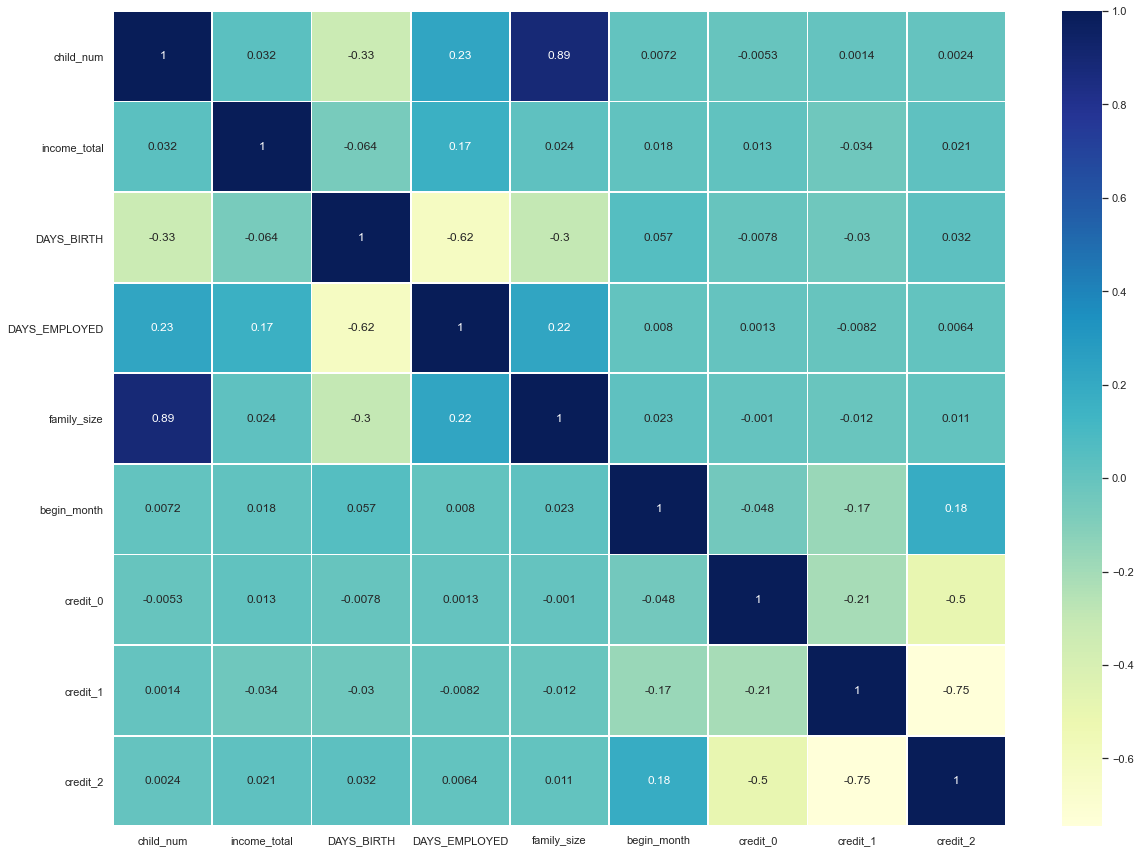

In [31]:
corr = pd.merge(main_df[numeric_col], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

family_size 와 child_num, DAYS_BIRTH와 DAYS_EMPLOYED 의 상관관계가 높은 것을 볼 수 있다.

In [32]:
print(main_df[["family_size","child_num"]].corr())
print(main_df[["DAYS_BIRTH","DAYS_EMPLOYED"]].corr())

             family_size  child_num
family_size     1.000000   0.889114
child_num       0.889114   1.000000
               DAYS_BIRTH  DAYS_EMPLOYED
DAYS_BIRTH       1.000000      -0.616213
DAYS_EMPLOYED   -0.616213       1.000000


### family_size와 child_num의 credit과 상관관계 뽑아보기

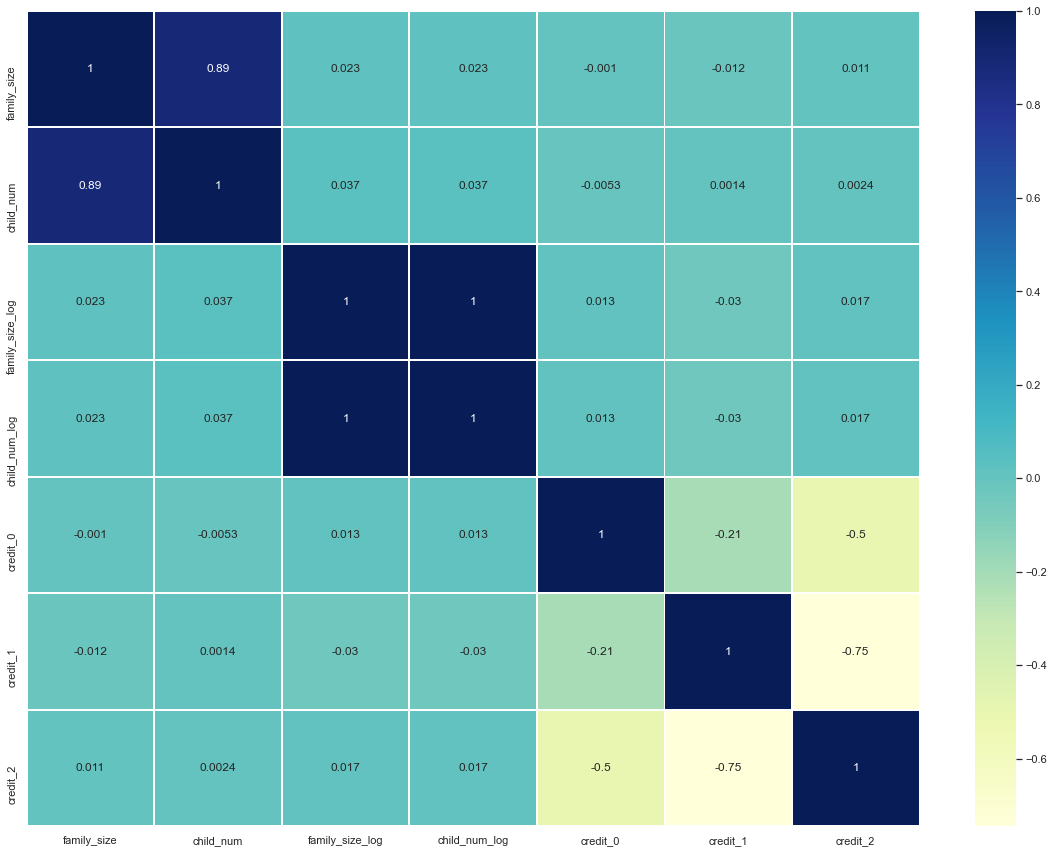

In [33]:
corr = pd.merge(df_all[["family_size","child_num","family_size_log","child_num_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

family_size 와 child_num 모두 log 변환 해준 것이 더 높은 상관관계를 보였고, 두 가지의 상관관계는 정확히 똑같음을 알 수 있다. <br>
-> family_size_log 값만 사용하겠다.

### DAYS_EMPLOYED 분석

<AxesSubplot:>

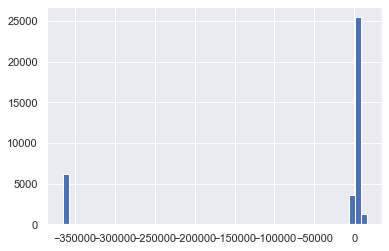

In [34]:
df_all["DAYS_EMPLOYED"].hist(bins=50)

음수값 -> 고용되지 않은 상태 -> 고용된 상태와 고용되지 않은 상태로 나눠보기

In [35]:
df_all["is_employed"] = df_all["DAYS_EMPLOYED"].map(lambda x: "N" if x < 0 else "Y").astype(object)
df_all["is_employed"]

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
36452    Y
36453    Y
36454    Y
36455    Y
36456    Y
Name: is_employed, Length: 36457, dtype: object

In [36]:
df_all = pd.merge(df_all, pd.get_dummies(df_all[["is_employed"]]), left_index=True, right_index=True)
df_all.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone_Y,email_N,email_Y,income_total_log,DAYS_EMPLOYED_log,family_size_log,child_num_log,is_employed,is_employed_N,is_employed_Y
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,13899,...,0,1,0,5.306426,5.306426,5.306426,5.306426,Y,0,1
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,11380,...,0,0,1,5.393576,5.393576,5.393576,5.393576,Y,0,1
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,19087,...,1,1,0,5.653213,5.653213,5.653213,5.653213,Y,0,1
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15088,...,1,1,0,5.306426,5.306426,5.306426,5.306426,Y,0,1
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,15037,...,0,1,0,5.197282,5.197282,5.197282,5.197282,Y,0,1


### DAYS_EMPLOYED, Log Transform, is_employed 상관관계

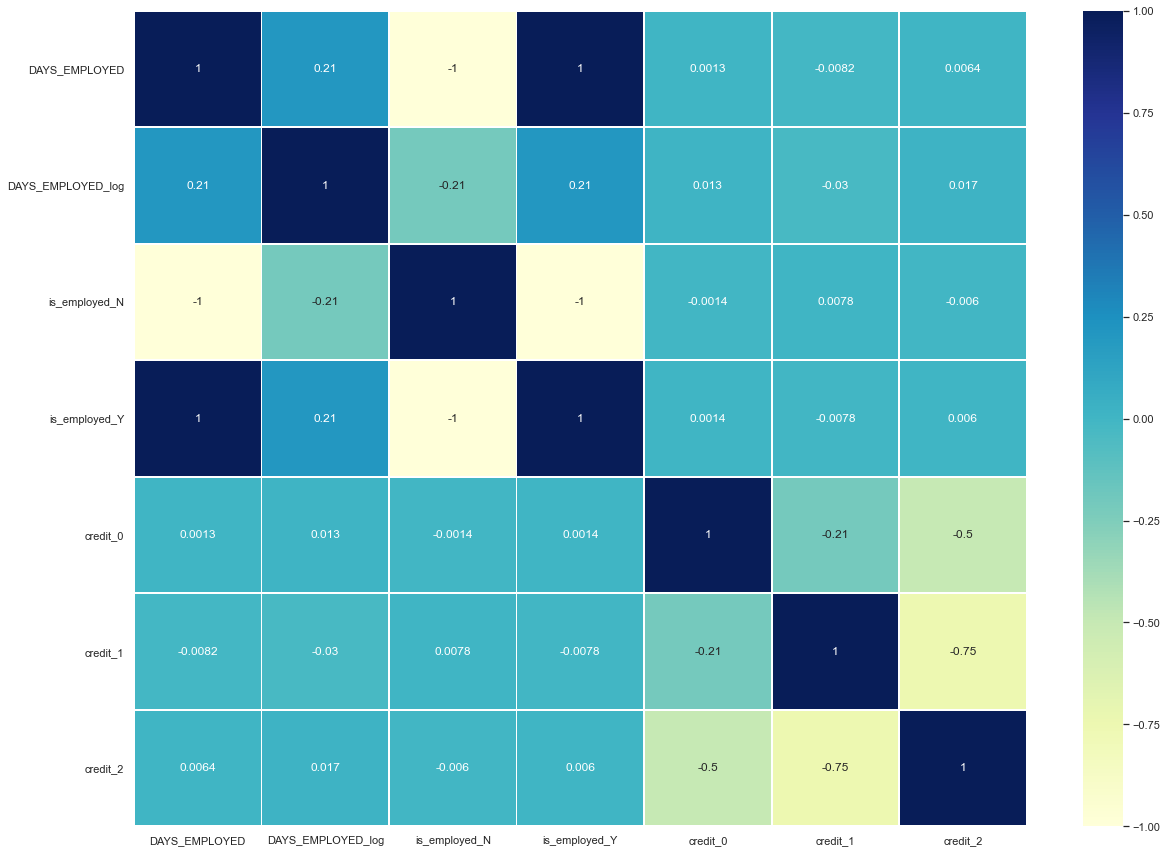

In [37]:
corr = pd.merge(df_all[["DAYS_EMPLOYED","DAYS_EMPLOYED_log","is_employed_N", "is_employed_Y"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- is_employed 값이 상관관계를 더 올려주진 않는다.
- log 변환 해준것이 상관관계를 조금이나마 올려주었다.

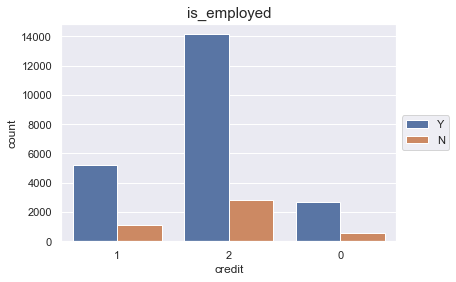

In [38]:
temp_df = pd.merge(df_all["is_employed"], y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue="is_employed", data=temp_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("is_employed", fontsize=15)
plt.show()

### DAYS_EMPLOYED 음수값 없애보기

<AxesSubplot:>

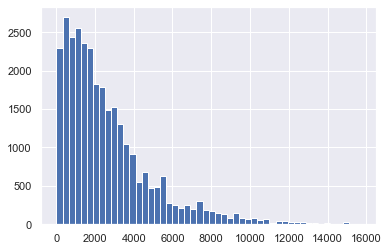

In [39]:
# 음수값 빼고 해보기
df_all["EMPLOYED_UP"] = df_all["DAYS_EMPLOYED"][df_all["DAYS_EMPLOYED"] >= 0]
df_all["EMPLOYED_UP"].hist(bins=50)

<AxesSubplot:>

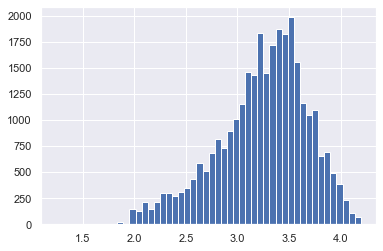

In [40]:
df_all["EMPLOYED_UP_log"] = np.log10(df_all["EMPLOYED_UP"]+0.5)
df_all["EMPLOYED_UP_log"].hist(bins=50)

In [41]:
df_all["EMPLOYED_UP"]

0         4709.0
1         1540.0
2         4434.0
3         2092.0
4         2105.0
          ...   
36452     5434.0
36453     1315.0
36454    14018.0
36455     1085.0
36456      187.0
Name: EMPLOYED_UP, Length: 36457, dtype: float64

### EMPLOYED_UP 상관관계

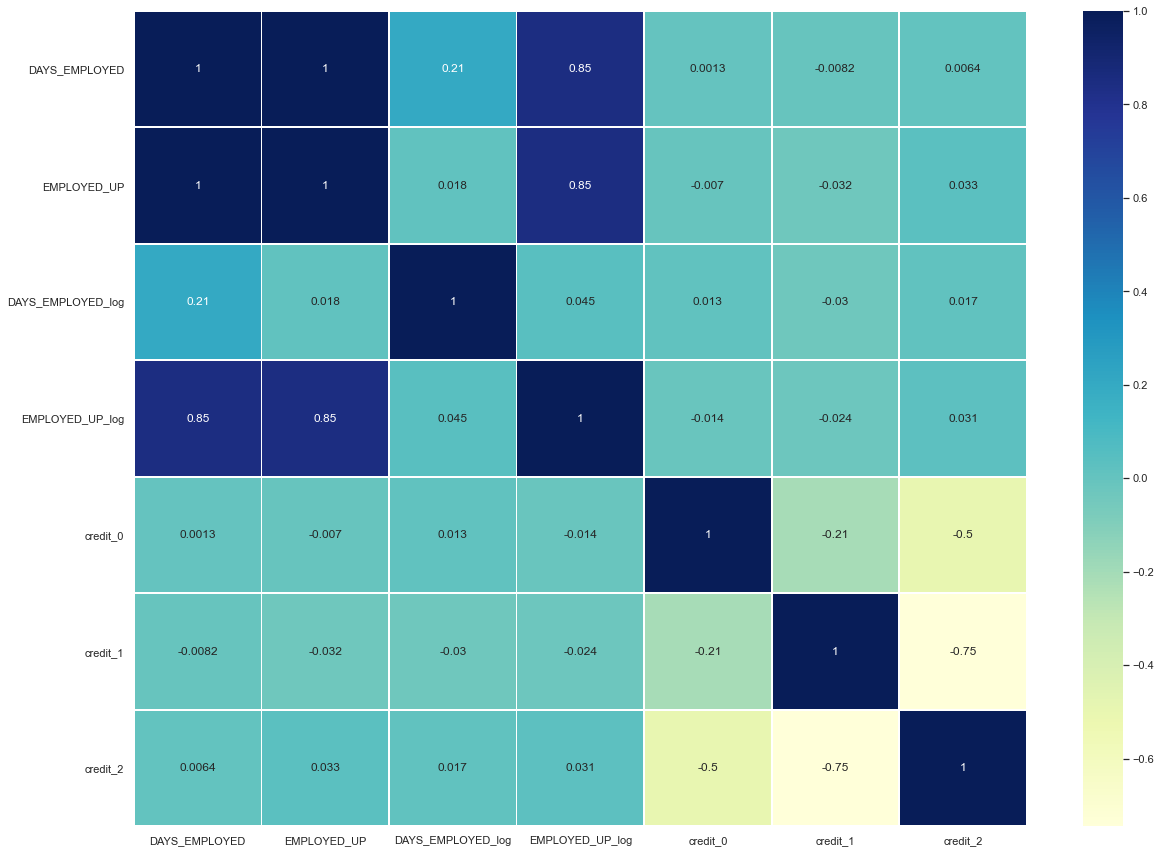

In [42]:
corr = pd.merge(df_all[["DAYS_EMPLOYED","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- 양의 값만 뽑아낸 것(EMPLOYED_UP)이 그나마 상관관계를 올려줌 -> 음수 값은 어떻게 처리할 것인가(현재는 null). 0? 최대값? 최빈값?

In [43]:
df_all["EMPLOYED_UP_zero"] = df_all["EMPLOYED_UP"].fillna(0)
df_all["EMPLOYED_UP_zero_log"] = np.log10(df_all["EMPLOYED_UP_zero"]+0.5)

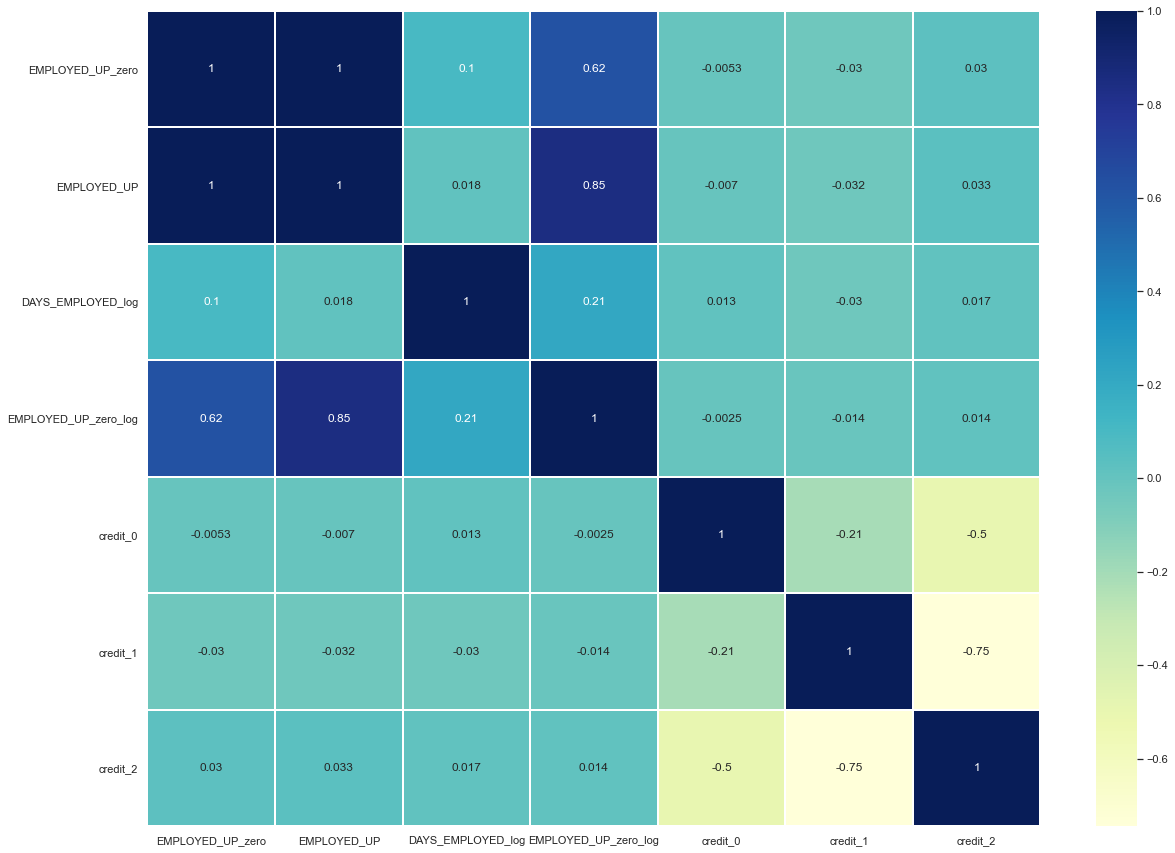

In [44]:
corr = pd.merge(df_all[["EMPLOYED_UP_zero","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_zero_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

In [45]:
df_all["EMPLOYED_UP_mean"] = df_all["EMPLOYED_UP"].fillna(df_all["EMPLOYED_UP"].mean())
df_all["EMPLOYED_UP_mean_log"] = np.log10(df_all["EMPLOYED_UP_mean"]+0.5)

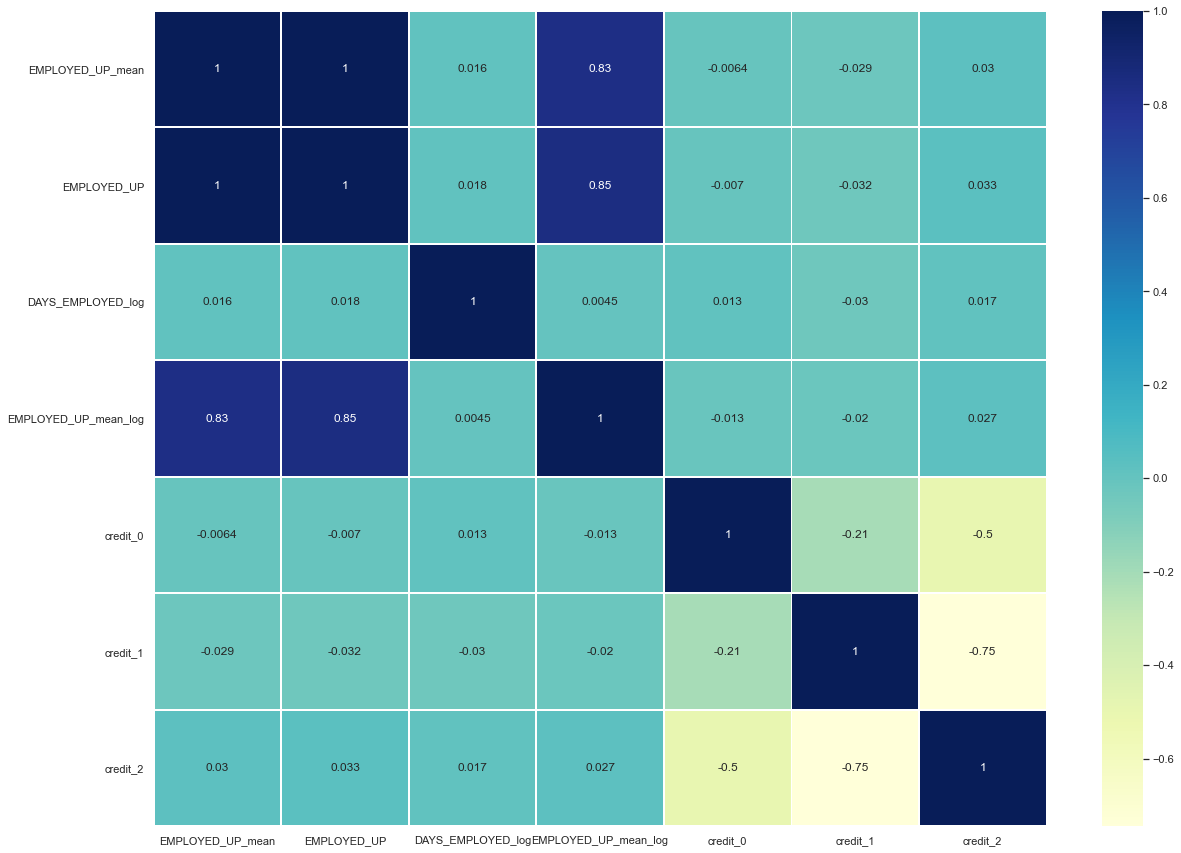

In [46]:
corr = pd.merge(df_all[["EMPLOYED_UP_mean","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_mean_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

In [47]:
df_all["EMPLOYED_UP_max"] = df_all["EMPLOYED_UP"].fillna(df_all["EMPLOYED_UP"].max())
df_all["EMPLOYED_UP_max_log"] = np.log10(df_all["EMPLOYED_UP_max"]+0.5)

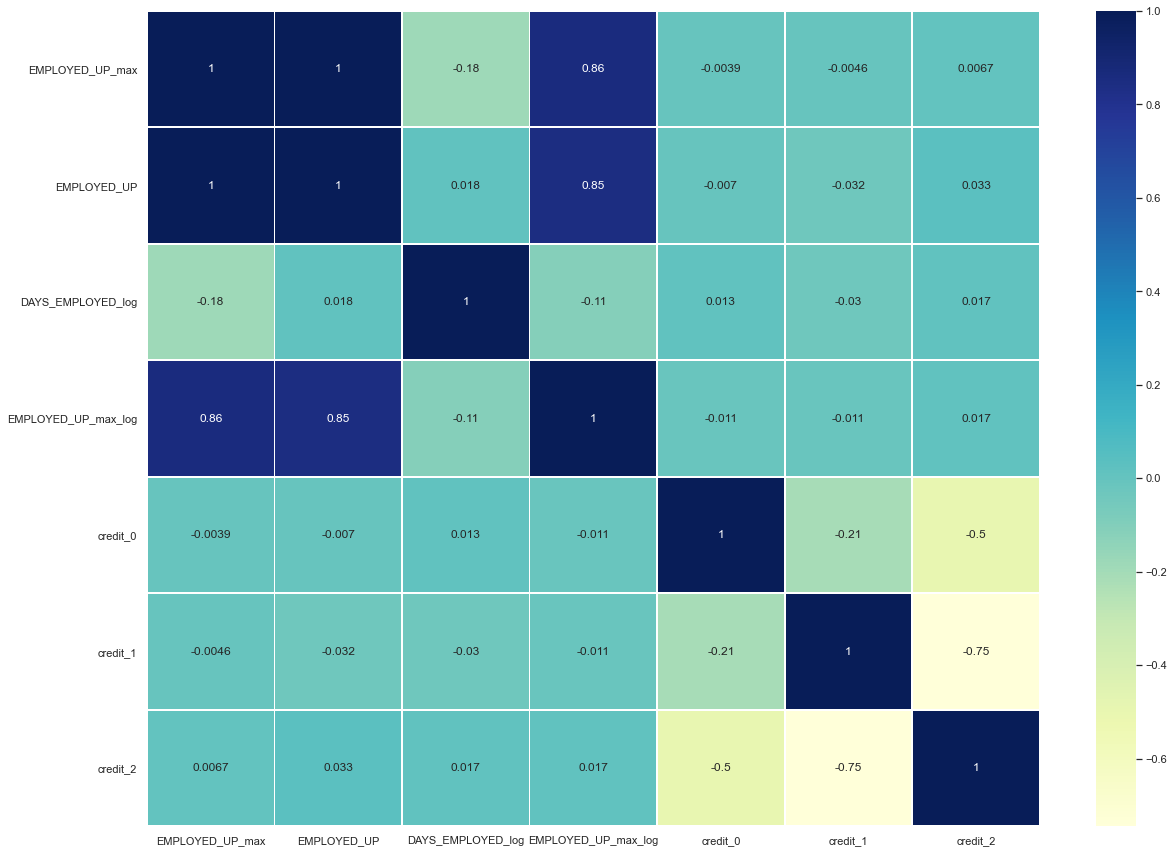

In [48]:
corr = pd.merge(df_all[["EMPLOYED_UP_max","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_max_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

In [49]:
df_all["EMPLOYED_UP_mode"] = df_all["EMPLOYED_UP"].fillna(df_all["EMPLOYED_UP"].mode().values[0])
df_all["EMPLOYED_UP_mode_log"] = np.log10(df_all["EMPLOYED_UP_mode"]+0.5)

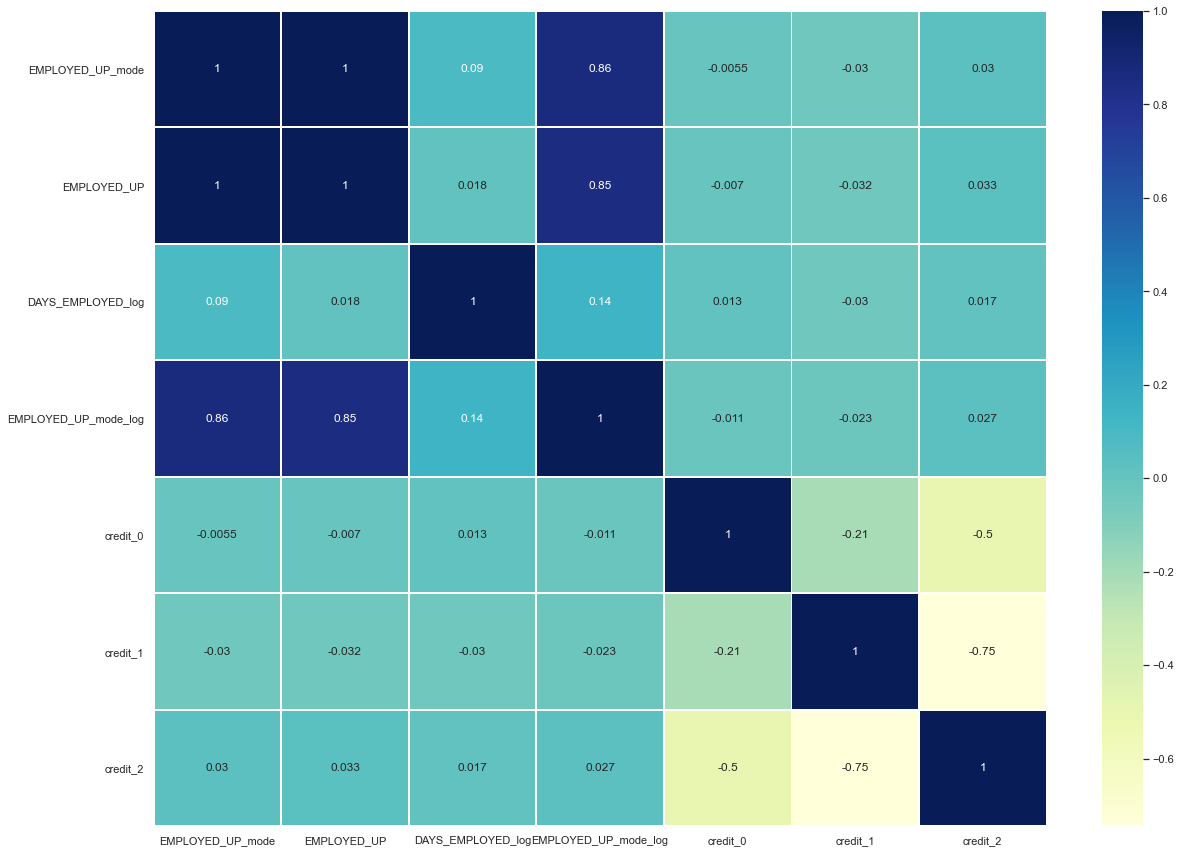

In [50]:
corr = pd.merge(df_all[["EMPLOYED_UP_mode","EMPLOYED_UP", "DAYS_EMPLOYED_log", "EMPLOYED_UP_mode_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- mean, zero, max, mode 다 넣어본 결과, max 빼고는 다 비슷, 데이터의 의미상 zero가 나은 것 같다.

# 여러가지 합치기

## 수입과의 관계

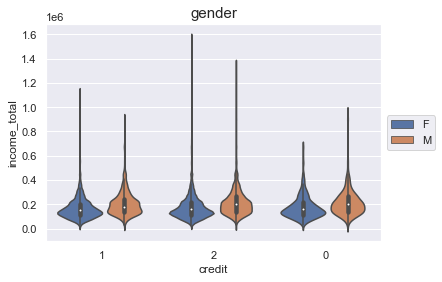

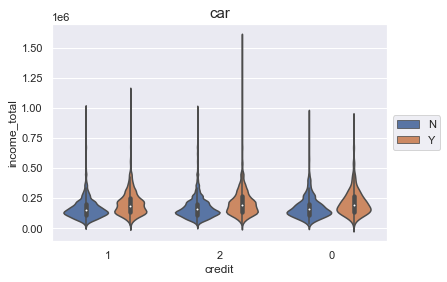

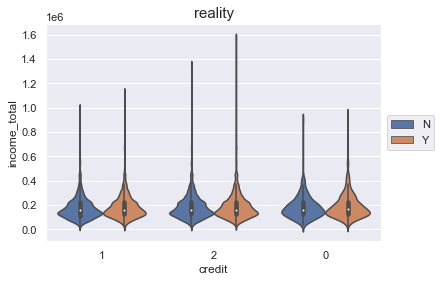

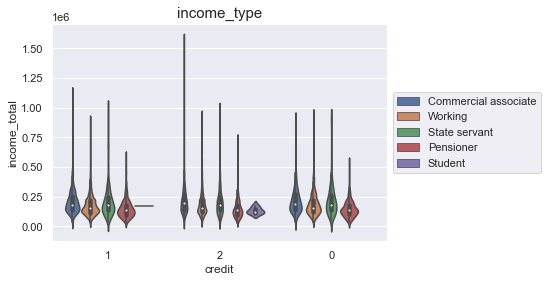

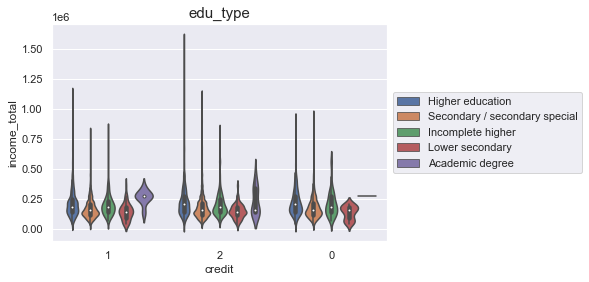

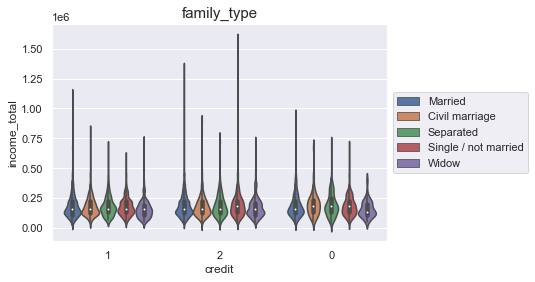

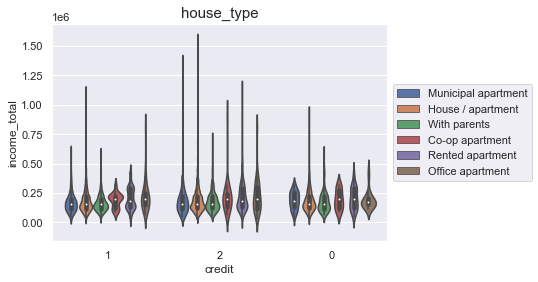

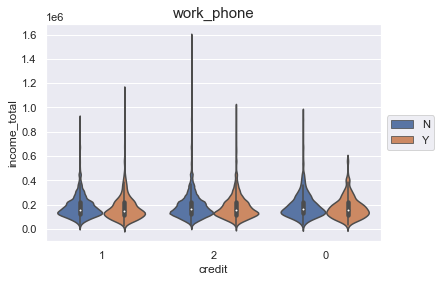

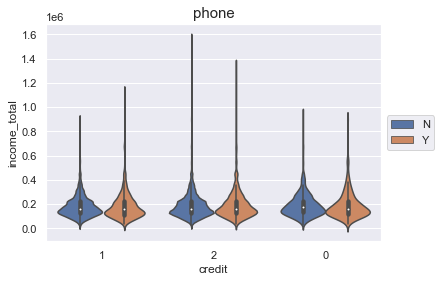

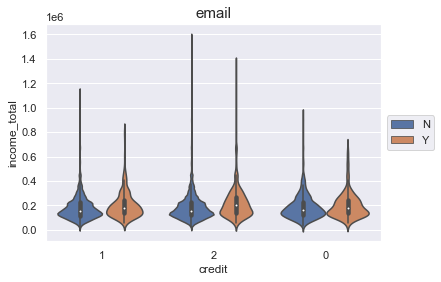

In [51]:
temp_df = pd.merge(main_df, y_train_data, left_index=True, right_index=True)

for col_name in object_col:
    sns.violinplot(x="credit", y="income_total", hue=col_name, data=temp_df, split=False)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(col_name, fontsize=15)
    plt.show()

## 신용카드 발급 나이에 따른 신용등급?

In [52]:
df_all["create_age"]  = (df_all["DAYS_BIRTH"] - df_all["begin_month"]*30)/365

In [53]:
temp_df = pd.merge(df_all[["create_age"]], y_train_data_onehot, left_index=True, right_index=True)
temp_df.corr()

,create_age,credit_0,credit_1,credit_2
create_age,1.000000,-0.002082,-0.009595,0.009925
credit_0,-0.002082,1.000000,-0.207469,-0.497962
credit_1,-0.009595,-0.207469,1.000000,-0.745018
credit_2,0.009925,-0.497962,-0.745018,1.000000


<AxesSubplot:>

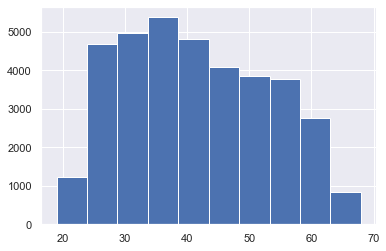

In [54]:
df_all["create_age"].hist()

<AxesSubplot:>

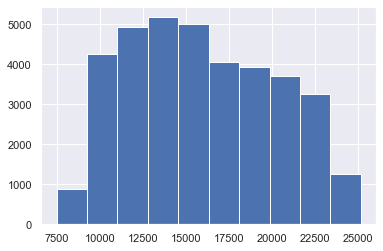

In [55]:
df_all["DAYS_BIRTH"].hist()

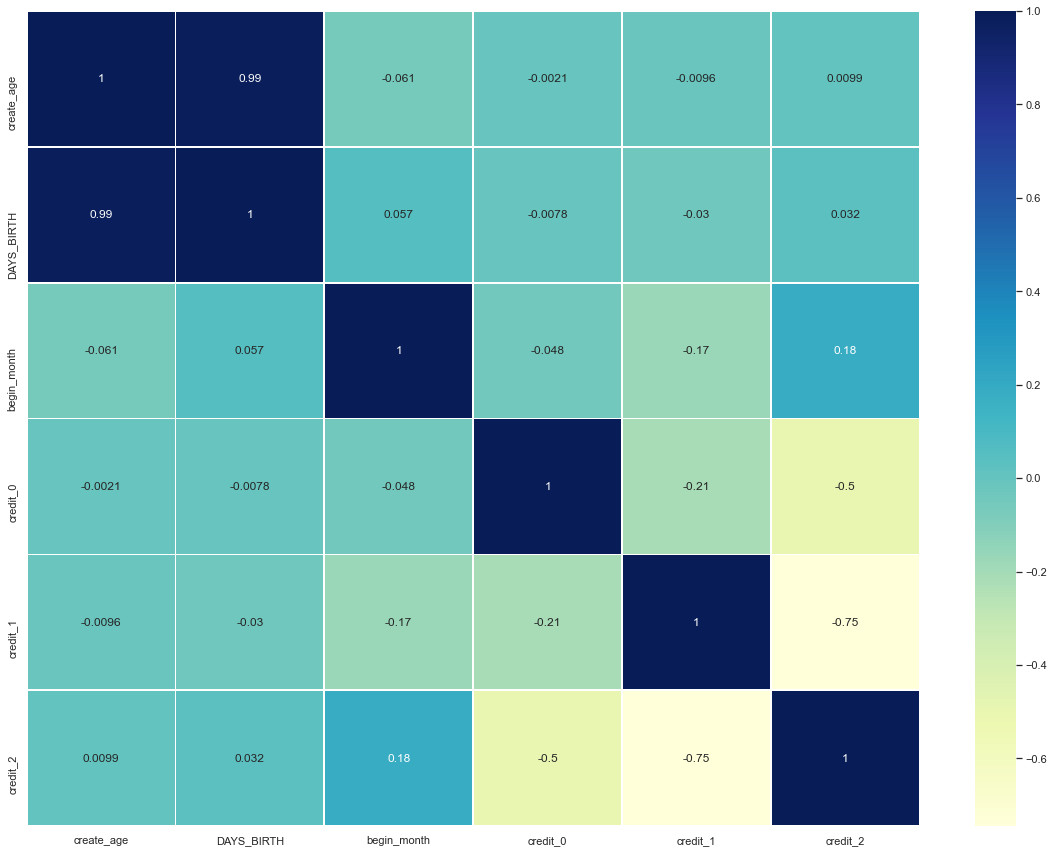

In [56]:
temp_df = pd.merge(df_all[["create_age","DAYS_BIRTH","begin_month"]], y_train_data_onehot, left_index=True, right_index=True)

corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- 상관관계는 볼 수 없다.

In [57]:
bins = [0, 20,30,40,50,60,70]
group_names = ['10s', '20s', '30s','40s','50s','60s']
df_all["create_age_bin"] = pd.cut(df_all['create_age'], bins, labels=group_names)

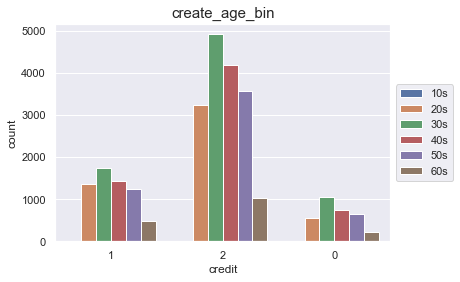

In [58]:
temp_df = pd.merge(df_all["create_age_bin"], y_train_data, left_index=True, right_index=True)
sns.countplot(x="credit", hue="create_age_bin", data=temp_df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("create_age_bin", fontsize=15)
plt.show()

In [59]:
df_all = pd.merge(df_all, pd.get_dummies(df_all[["create_age_bin"]]), left_index=True, right_index=True)

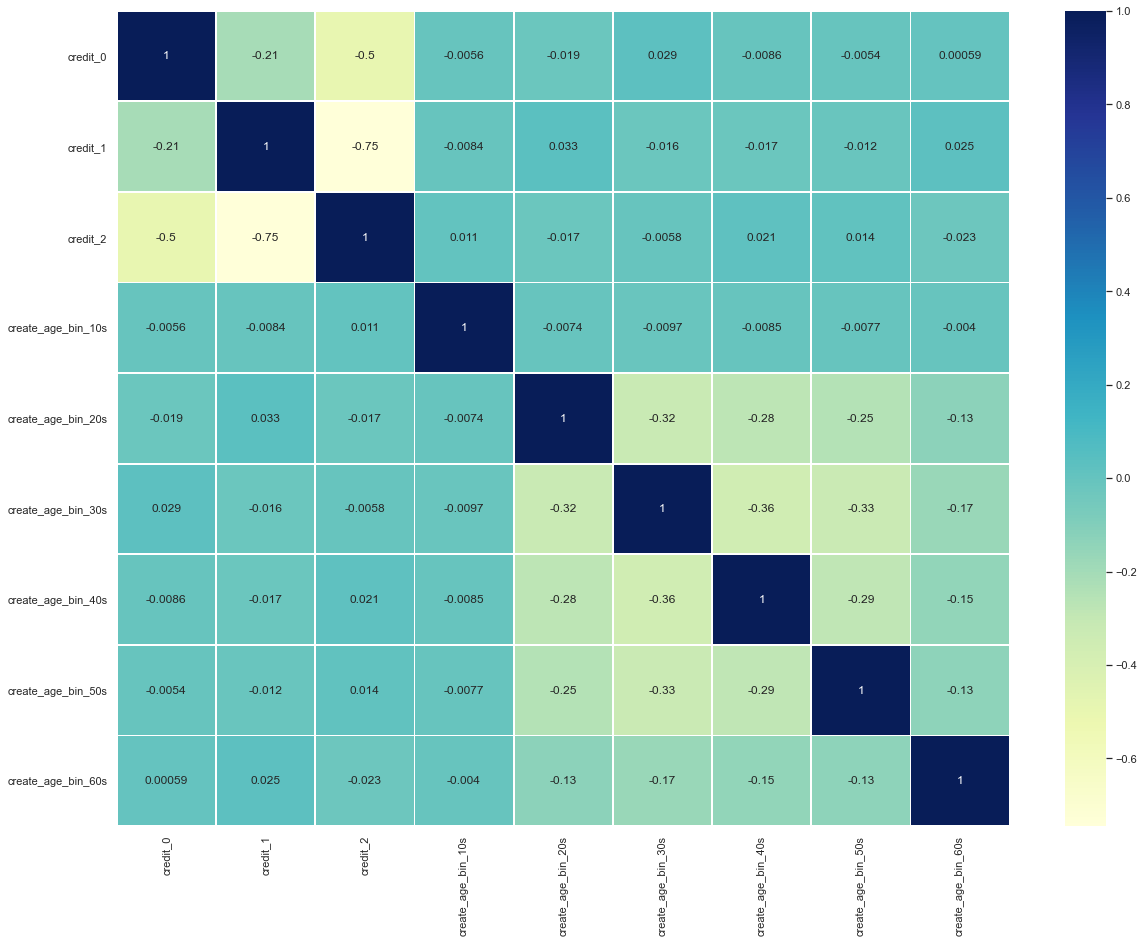

In [60]:
temp_df = pd.merge(y_train_data_onehot, pd.get_dummies(df_all[["create_age_bin"]]), left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

### Mean 인코딩 해보기

In [61]:
temp_df = pd.merge(df_all["create_age_bin"], y_train_data_onehot, left_index=True, right_index=True)

print(temp_df.groupby("create_age_bin")['credit_0'].mean(), "\n")
print(temp_df.groupby("create_age_bin")['credit_1'].mean(), "\n")
print(temp_df.groupby("create_age_bin")['credit_2'].mean())

create_age_bin
10s    0.000000
20s    0.109348
30s    0.136570
40s    0.116797
50s    0.118356
60s    0.122520
Name: credit_0, dtype: float64 

create_age_bin
10s    0.000000
20s    0.265725
30s    0.226408
40s    0.223705
50s    0.227215
60s    0.277713
Name: credit_1, dtype: float64 

create_age_bin
10s    1.000000
20s    0.624927
30s    0.637023
40s    0.659498
50s    0.654429
60s    0.599767
Name: credit_2, dtype: float64


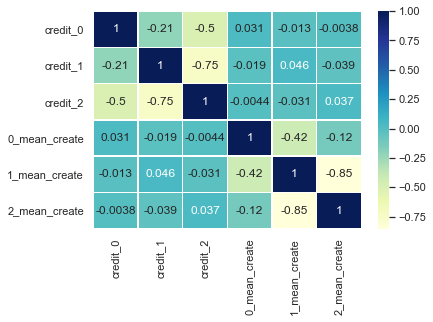

In [62]:
temp_df["0_mean_create"] = temp_df["create_age_bin"].replace(temp_df.groupby("create_age_bin")["credit_0"].mean())
temp_df["1_mean_create"] = temp_df["create_age_bin"].replace(temp_df.groupby("create_age_bin")["credit_1"].mean())
temp_df["2_mean_create"] = temp_df["create_age_bin"].replace(temp_df.groupby("create_age_bin")["credit_2"].mean())

corr = temp_df.corr()
sns.set()
ax = sns.heatmap(corr, annot=True,  linewidths=.5, cmap="YlGnBu")

## 연간 소득 / 가족 규모 or 자녀의 수 가 높을 수록 신용등급이 좋다?

In [63]:
df_all["income/family"] = df_all["income_total"] / df_all["family_size"]
df_all["income/child"] = df_all["income_total"] / (df_all["child_num"] + 1)

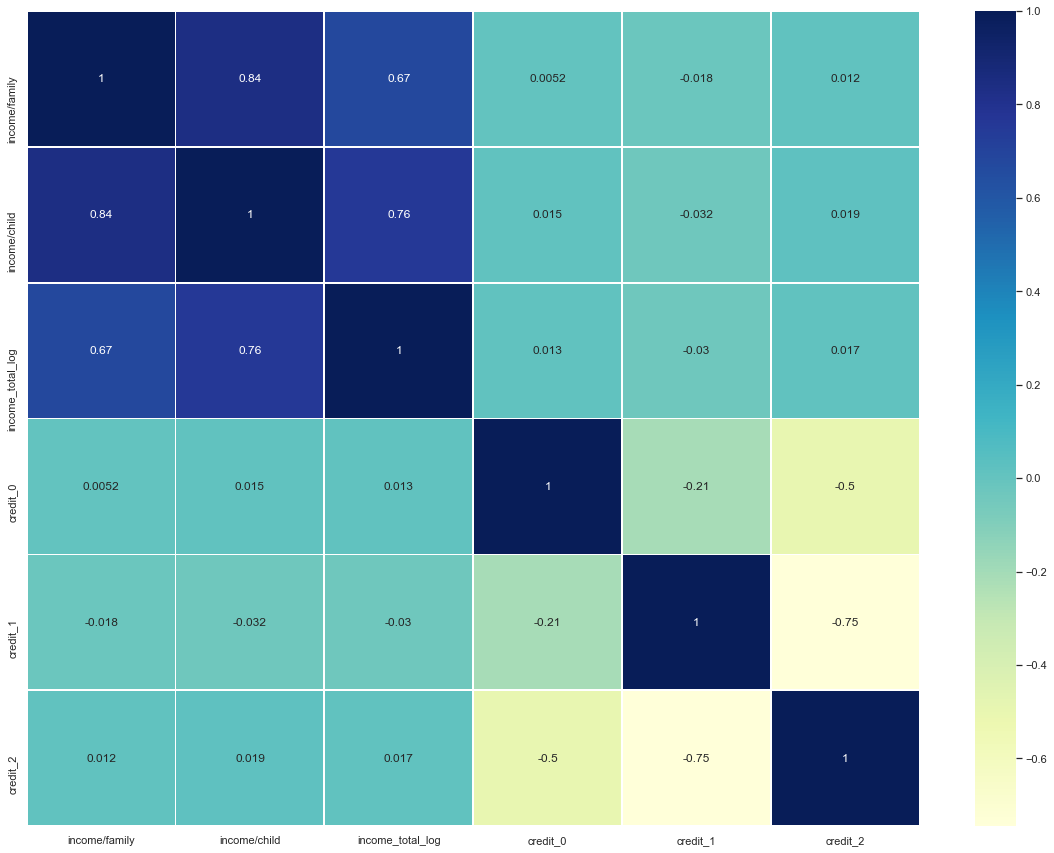

In [64]:
corr = pd.merge(df_all[["income/family", "income/child", "income_total_log"]], y_train_data_onehot, left_index=True, right_index=True).corr()

sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

## 차량, 부동산, 업무용 핸드폰, 전화, 이메일 이 6가지 항목 중에 소유 항목 개수가 많을수록 신용도 높다?

In [65]:
main_df[["car", "reality","work_phone","phone","email"]]

,car,reality,work_phone,phone,email
0,N,N,N,N,N
1,N,Y,N,N,Y
2,Y,Y,N,Y,N
3,N,Y,N,Y,N
4,Y,Y,N,N,N
...,...,...,...,...,...
36452,Y,Y,Y,Y,N
36453,Y,Y,Y,N,N
36454,N,Y,N,N,N
36455,Y,N,N,Y,N


In [66]:
temp_df = main_df[["car", "reality","work_phone","phone","email"]]

df_all["num_crwpe"] = temp_df.apply(lambda x: x.value_counts(), axis=1).fillna(0).astype(int)["Y"]

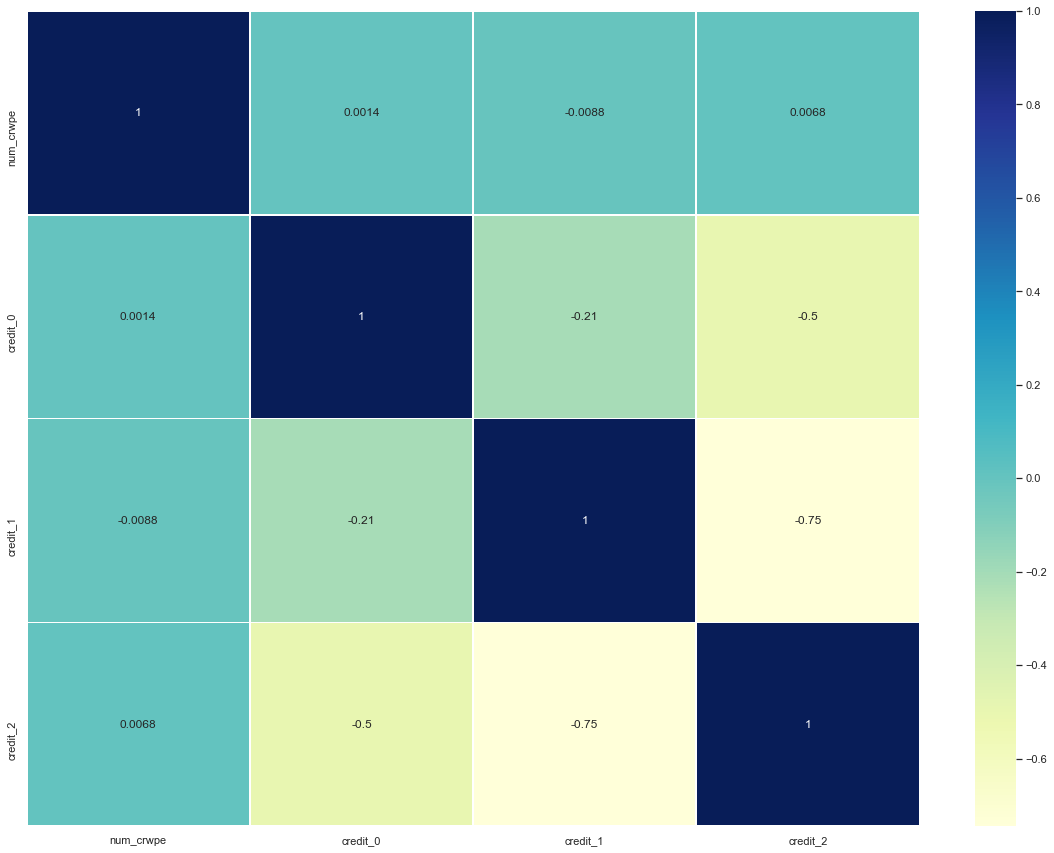

In [67]:
temp_df = pd.merge(df_all[["num_crwpe"]], y_train_data_onehot, left_index=True, right_index=True)
corr = temp_df.corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

In [68]:
main_df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month'],
      dtype='object')

# Training

In [69]:
main_df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month'],
      dtype='object')

In [70]:
df_all.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'work_phone', 'phone', 'email', 'family_size', 'begin_month',
       'gender_F', 'gender_M', 'car_N', 'car_Y', 'reality_N', 'reality_Y',
       'work_phone_N', 'work_phone_Y', 'phone_N', 'phone_Y', 'email_N',
       'email_Y', 'income_total_log', 'DAYS_EMPLOYED_log', 'family_size_log',
       'child_num_log', 'is_employed', 'is_employed_N', 'is_employed_Y',
       'EMPLOYED_UP', 'EMPLOYED_UP_log', 'EMPLOYED_UP_zero',
       'EMPLOYED_UP_zero_log', 'EMPLOYED_UP_mean', 'EMPLOYED_UP_mean_log',
       'EMPLOYED_UP_max', 'EMPLOYED_UP_max_log', 'EMPLOYED_UP_mode',
       'EMPLOYED_UP_mode_log', 'create_age', 'create_age_bin',
       'create_age_bin_10s', 'create_age_bin_20s', 'create_age_bin_30s',
       'create_age_bin_40s', 'create_age_bin_50s', 'create_age_bin_60s',
       'income/family', 'income/child', 'num_crwpe'],
      d

In [71]:
final_df = df_all.drop(object_col,axis=1)
final_df = final_df.drop(["is_employed","child_num", "family_size", "DAYS_EMPLOYED","income_total_log","DAYS_EMPLOYED_log",
                         "child_num_log","EMPLOYED_UP_log","create_age","create_age_bin","income/family","family_size_log",
                         "EMPLOYED_UP", 'EMPLOYED_UP_mean', 'EMPLOYED_UP_mean_log','EMPLOYED_UP_zero_log',
                          'EMPLOYED_UP_max', 'EMPLOYED_UP_max_log','EMPLOYED_UP_mode', 'EMPLOYED_UP_mode_log',
                         'car_N', 'car_Y', 'reality_N', 'reality_Y', 'work_phone_N', 'work_phone_Y', 'phone_N', 
                          'phone_Y', 'email_N', 'email_Y','is_employed_N', 'is_employed_Y'],axis=1)

In [72]:
final_df.columns

Index(['income_total', 'DAYS_BIRTH', 'begin_month', 'gender_F', 'gender_M',
       'EMPLOYED_UP_zero', 'create_age_bin_10s', 'create_age_bin_20s',
       'create_age_bin_30s', 'create_age_bin_40s', 'create_age_bin_50s',
       'create_age_bin_60s', 'income/child', 'num_crwpe'],
      dtype='object')

### Standardization 과 Min-Max Normalization 해보기

In [73]:
from sklearn import preprocessing
std_scaler = preprocessing.StandardScaler().fit(final_df[['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero"]])
df_std = std_scaler.transform(final_df[['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero"]])

final_df[['income_total_std', 'income/child_std' ,"DAYS_BIRTH_std", "begin_month_std","EMPLOYED_UP_zero_std"]] = df_std

In [74]:
minmax_scaler = preprocessing.MinMaxScaler().fit(final_df[['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero"]])
df_min_max = minmax_scaler.transform(final_df[['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero"]])

final_df[['income_total_mm', 'income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm", "EMPLOYED_UP_zero_mm"]] = df_min_max

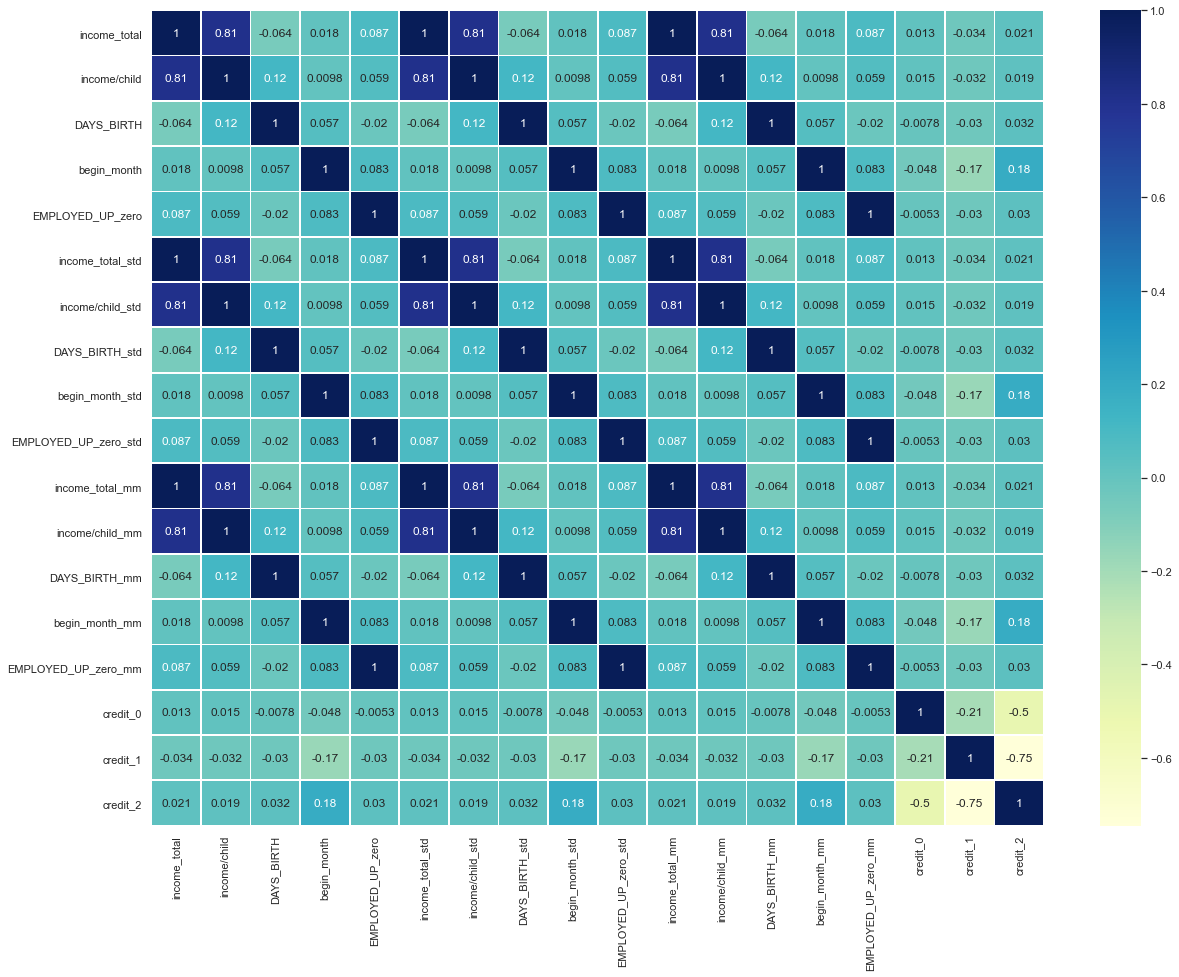

In [75]:
temp_df = final_df[['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month","EMPLOYED_UP_zero",
          'income_total_std', 'income/child_std' ,"DAYS_BIRTH_std", "begin_month_std","EMPLOYED_UP_zero_std",
         'income_total_mm', 'income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm","EMPLOYED_UP_zero_mm"]]

corr = pd.merge(temp_df, y_train_data_onehot, left_index=True, right_index=True).corr()
sns.set()
plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr, annot=True,  linewidths=.8, cmap="YlGnBu")

- standardization과 minmax scaling을 안한 것이 트레이닝에서 더 좋은 결과를 보여준다.

In [76]:
final_df_base = final_df.drop(['income_total_std', 'income/child_std' ,"DAYS_BIRTH_std", "begin_month_std", "EMPLOYED_UP_zero_std",
               'income_total_mm', 'income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm", "EMPLOYED_UP_zero_mm"], axis=1)

In [77]:
final_df_std = final_df.drop(['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero",
               'income_total_mm', 'income/child_mm' ,"DAYS_BIRTH_mm", "begin_month_mm", "EMPLOYED_UP_zero_mm"], axis=1)

In [78]:
final_df_mm = final_df.drop(['income_total', 'income/child' ,"DAYS_BIRTH", "begin_month", "EMPLOYED_UP_zero",
               'income_total_std', 'income/child_std' ,"DAYS_BIRTH_std", "begin_month_std", "EMPLOYED_UP_zero_std"], axis=1)

In [79]:
X_train = final_df_base[:number_of_train_data].values

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

result = cross_val_score(RandomForestClassifier(), X_train, y_train_data, scoring="accuracy", cv=5)
result.mean()

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

0.6962237605094748

In [80]:
X_train = final_df_std[:number_of_train_data].values
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

result = cross_val_score(RandomForestClassifier(), X_train, y_train_data, scoring="accuracy", cv=5)
result.mean()

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

0.6962237962237963

In [81]:
X_train = final_df_mm[:number_of_train_data].values
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

result = cross_val_score(RandomForestClassifier(), X_train, y_train_data, scoring="accuracy", cv=5)
result.mean()

C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\zxwlg\miniconda3\envs\data_science\lib\site-packages\sklearn\mod

0.6968285896857325

In [82]:
train_x = final_df_std[:number_of_train_data]
train_y = y_train_data.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 14)
(19842, 1)
Validation set: 
(6615, 14)
(6615, 1)


<ipython-input-82-4f02b2cf686e>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


log_loss: 0.9198962615948062


In [83]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_df_std[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

<ipython-input-83-8a2ee7b3a080>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.9352336162085558


<ipython-input-83-8a2ee7b3a080>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.9532583320904952


<ipython-input-83-8a2ee7b3a080>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.9397109701876853


<ipython-input-83-8a2ee7b3a080>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.959292092413324


<ipython-input-83-8a2ee7b3a080>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.9407697253851812
Mean:0.9456529472570484


In [84]:
train_x = final_df_mm[:number_of_train_data]
train_y = y_train_data.copy()

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 14)
(19842, 1)
Validation set: 
(6615, 14)
(6615, 1)


<ipython-input-84-a25edad63d4c>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


log_loss: 0.9640606330708401


In [85]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_df_mm[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

<ipython-input-85-dac31f039d5c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.9200827936285886


<ipython-input-85-dac31f039d5c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.9522731110527949


<ipython-input-85-dac31f039d5c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.9023246520038345


<ipython-input-85-dac31f039d5c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.9042056278680315


<ipython-input-85-dac31f039d5c>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.9599937895303953
Mean:0.927775994816729


In [86]:
train_x = final_df_base[:number_of_train_data]
train_y = y_train_data.copy()

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 14)
(19842, 1)
Validation set: 
(6615, 14)
(6615, 1)


<ipython-input-86-f4dc7c3e8175>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


log_loss: 0.9690249935425282


In [87]:
from sklearn.model_selection import KFold, StratifiedKFold

test_x = final_df_base[number_of_train_data:]

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

<ipython-input-87-af57ed1253e1>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 0 : logloss:0.9330386050952361


<ipython-input-87-af57ed1253e1>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 1 : logloss:0.8827854191782893


<ipython-input-87-af57ed1253e1>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 2 : logloss:0.9424217364201264


<ipython-input-87-af57ed1253e1>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 3 : logloss:0.9045964154848325


<ipython-input-87-af57ed1253e1>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


FOLD 4 : logloss:0.9702281167542249
Mean:0.9266140585865419


In [88]:
my_submission

array([[0.09      , 0.164     , 0.746     ],
       [0.356     , 0.09      , 0.554     ],
       [0.027     , 0.086     , 0.887     ],
       ...,
       [0.01      , 0.0422    , 0.9478    ],
       [0.38333333, 0.3375    , 0.27916667],
       [0.049     , 0.15819048, 0.79280952]])

In [89]:
submission=pd.read_csv('./data/sample_submission.csv')

In [90]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [91]:
submission.loc[:,1:]=my_submission

<ipython-input-91-d0b2fc34f2bc>:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  submission.loc[:,1:]=my_submission


In [92]:
submission

,index,0,1,2
0,26457,0.090000,0.164000,0.746000
1,26458,0.356000,0.090000,0.554000
2,26459,0.027000,0.086000,0.887000
3,26460,0.051567,0.210000,0.738433
4,26461,0.107933,0.319333,0.572733
...,...,...,...,...
9995,36452,0.138267,0.172800,0.688933
9996,36453,0.162000,0.497000,0.341000
9997,36454,0.010000,0.042200,0.947800
9998,36455,0.383333,0.337500,0.279167


In [93]:
submission.to_csv('./data/3_submission.csv', index=False)